<a href="https://colab.research.google.com/github/cleogrs/analytics/blob/main/Modelos_de_Classifica%C3%A7%C3%A3o_e_Regress%C3%A3o_Log%C3%ADstica_Cleo_Gomes_da_Rocha_Santos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset iris

In [28]:
from sklearn import datasets
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Carregar o dataset Iris
iris = datasets.load_iris()

# Criar um DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Mostrar as primeiras linhas do DataFrame
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


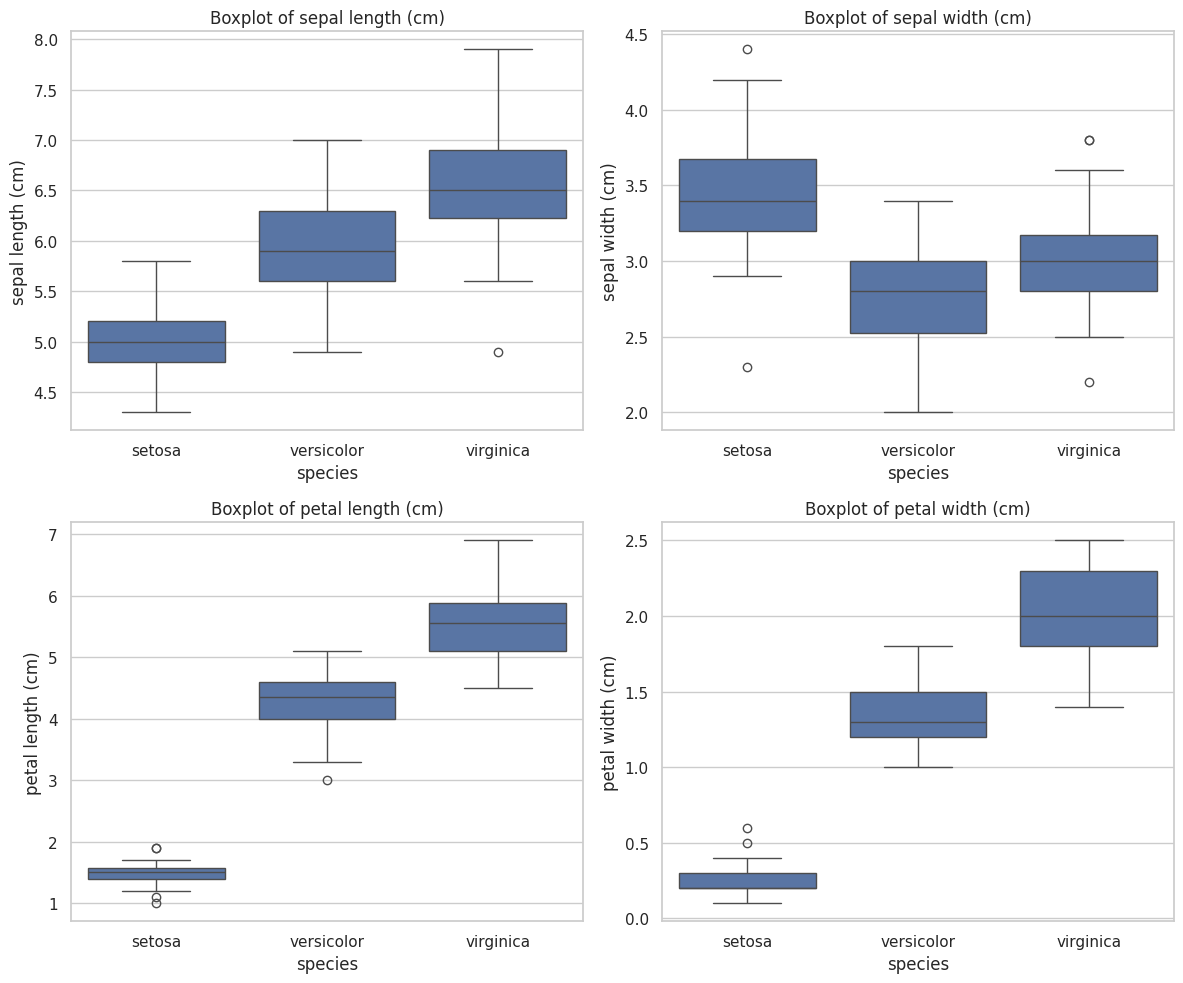

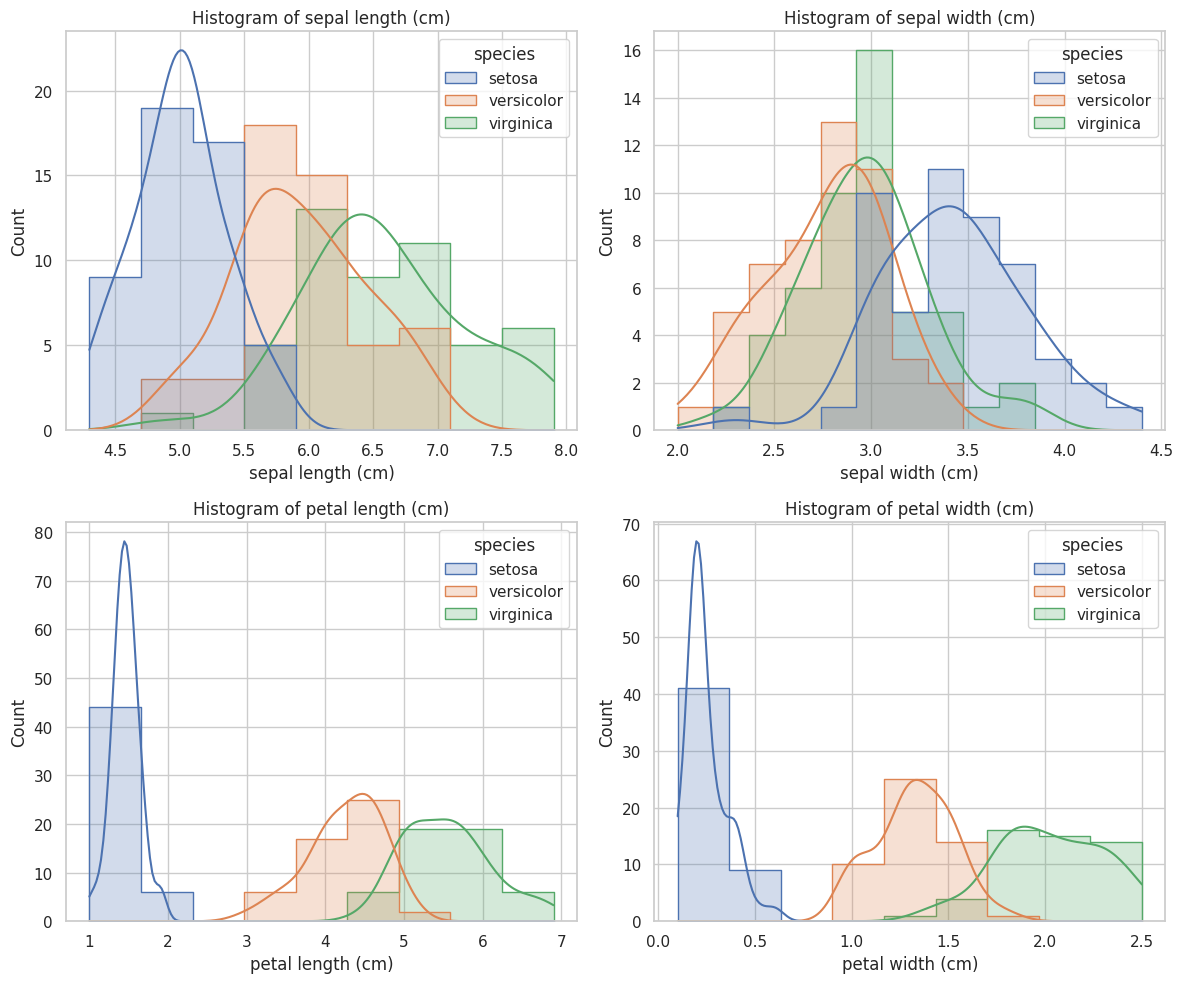

In [9]:
# Configurar o estilo dos gráficos
sns.set(style="whitegrid")

# Criar os boxplots
plt.figure(figsize=(12, 10))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='species', y=feature, data=iris_df)
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

# Criar os histogramas
plt.figure(figsize=(12, 10))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=iris_df, x=feature, hue='species', kde=True, element="step")
    plt.title(f'Histogram of {feature}')

plt.tight_layout()
plt.show()

Ao analisar os boxplots e histogramas, é possível observar as seguintes características que diferenciam as espécies:

Iris-setosa: Esta espécie possui valores bem distintos nas características de comprimento e largura das pétalas. As pétalas da Iris-setosa são claramente mais curtas e estreitas em comparação com as outras duas espécies. Isso é evidente nos boxplots e histogramas de petal length (cm) e petal width (cm).

Iris-versicolor e Iris-virginica: Essas duas espécies têm mais sobreposição nas características de sépala, mas ainda apresentam diferenças nas pétalas. Em geral, Iris-virginica tende a ter pétalas mais longas e largas do que Iris-versicolor, mas há uma sobreposição significativa entre os valores dessas duas espécies.

Portanto, sim, é possível utilizar uma ou mais das propriedades (especialmente petal length e petal width) para diferenciar entre as diferentes espécies. As pétalas são particularmente discriminativas para separar Iris-setosa das outras duas espécies, enquanto a combinação de várias características pode ser necessária para distinguir completamente Iris-versicolor de Iris-virginica.

In [33]:
# Carregar o dataset Iris
iris = datasets.load_iris()

# Criar um DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Separar as características e os rótulos
X = iris.data
y = iris.target

# Dividir os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Instanciar o modelo de regressão logística
log_reg = LogisticRegression(max_iter=200)

# Treinar o modelo
log_reg.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = log_reg.predict(X_test)

# Avaliar o modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



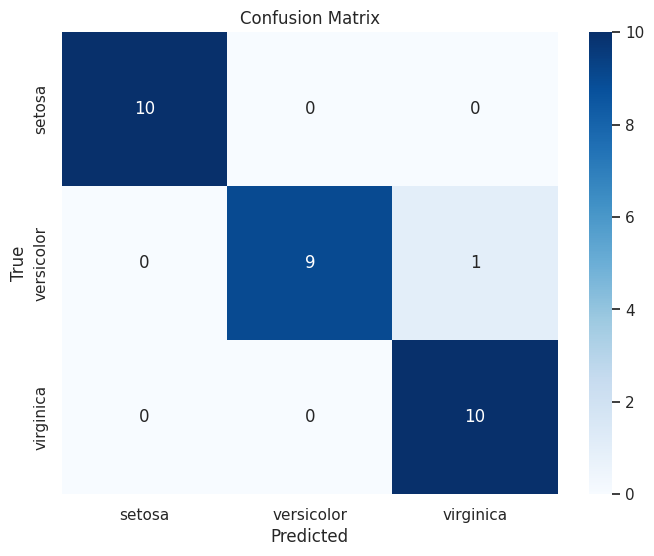

In [34]:
# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Dataset load_digits

In [40]:
# Carregar o dataset
digits = load_digits()

# Criar um DataFrame
digits_df = pd.DataFrame(data=digits.data, columns=[f'pixel_{i}' for i in range(digits.data.shape[1])])
digits_df['target'] = digits.target

# Verificar se existem dados nulos
isnan = np.isnan(digits.data).sum()

# Número de amostras
num_samples = digits.data.shape[0]

# Número de características
num_features = digits.data.shape[1]

print(f"Número de amostras: {num_samples}")
print(f"Números nulos: {isnan}")
print(f"Categorias: \n{digits_df.dtypes.value_counts()}")
print(f"Número de características: {num_features}")

Número de amostras: 1797
Números nulos: 0
Categorias: 
float64    64
int64       1
Name: count, dtype: int64
Número de características: 64


i. Possui 1797 dados.

ii.Não há dados nulos no dataset de dígitos.

iii. Todos são dados numéricos.

In [39]:
# Separar as características e os rótulos
X = digits.data
y = digits.target

# Dividir os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Instanciar o modelo de regressão logística
log_reg = LogisticRegression(max_iter=10000)

# Treinar o modelo
log_reg.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = log_reg.predict(X_test)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)

# Gerar o relatório de classificação
class_report = classification_report(y_test, y_pred, output_dict=True)

# Extrair precisão e recall para cada classe
precision = {k: v['precision'] for k, v in class_report.items() if k != 'accuracy'}
recall = {k: v['recall'] for k, v in class_report.items() if k != 'accuracy'}

# Exibir os resultados
print(f"Acurácia: {accuracy}")
print(f"Precisão por classe: {precision}")
print(f"Recall por classe: {recall}")

Acurácia: 0.9611111111111111
Precisão por classe: {'0': 0.972972972972973, '1': 0.9117647058823529, '2': 1.0, '3': 0.9487179487179487, '4': 0.972972972972973, '5': 0.972972972972973, '6': 1.0, '7': 0.9722222222222222, '8': 0.8611111111111112, '9': 1.0, 'macro avg': 0.9612734906852554, 'weighted avg': 0.961441767936866}
Recall por classe: {'0': 1.0, '1': 0.8611111111111112, '2': 1.0, '3': 1.0, '4': 1.0, '5': 0.972972972972973, '6': 0.9722222222222222, '7': 0.9722222222222222, '8': 0.8857142857142857, '9': 0.9444444444444444, 'macro avg': 0.960868725868726, 'weighted avg': 0.9611111111111111}


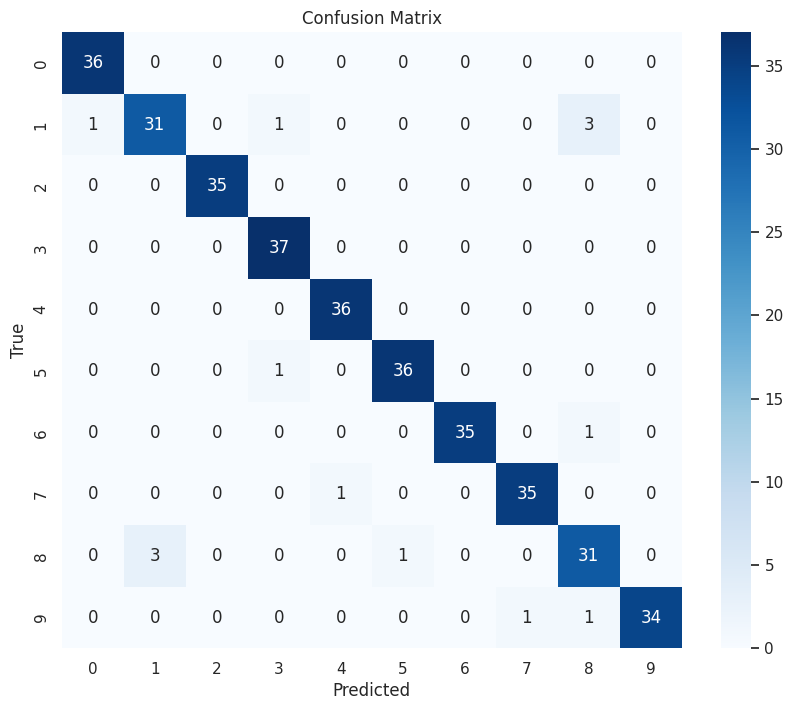

In [32]:
# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()